In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

### Initial observations - Statistical summary and Data types.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Observation 
---
    - There are no Null/NaN values in the datasets.
    - We can drop Id and date column as id is not relevant to the data and we will not be using date as a predictor.

In [5]:
df.drop(columns=['id','date'],inplace=True)

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Observation 
---
    - Bedrooms column has an outlier as the max value of bedrooms is 33 and this value will affect most of the column values such as bathrooms and area related features also it is not ideal for a first time house buyer so we will remove data which has bedrooms more than 5.

In [7]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [8]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
df.drop(df[df.bedrooms > 5].index, inplace=True)
df.shape

(21279, 19)

### Drop duplicate rows if any.

In [10]:
df.duplicated().sum()

5

In [11]:
df.drop_duplicates(inplace=True,keep='last')
df.shape

(21274, 19)

### Cleaning square foot realted columns.

_`sqft_above` + `sqft_basement` = `sqft_living` so let's check if there is any data not adding up._

In [12]:
print((df.sqft_basement != df.sqft_living - df.sqft_above).sum())

0


#### Observation 
---
    - As the sum is 0 it tells us We don't have any incorrect data.
    - Let's create column called has_basement with value 0 if it does not have basement and 1 if it has. this could be a good predictor.

In [13]:
df['basement'] = [1 if b > 0 else 0 for b in df.sqft_basement]
df.shape

(21274, 20)

#### Observation 
---
    - `sqft_living15` and `sqft_lot15` are data of 15 nearest house which is irrelevant to the data of the house we are looking at. so let's drop those coloumns.

In [14]:
df.drop(columns=['sqft_living15','sqft_lot15'],inplace=True)

In [15]:
df.shape

(21274, 18)

### Value Counts and Unique values of columns.

In [16]:
df.yr_renovated.value_counts()

0       20390
2014       91
2013       36
2000       35
2007       35
        ...  
1934        1
1948        1
1954        1
1944        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

#### Observation 
---
    - As we don't have year of renovation of 20K data we will drop this column.

In [17]:
df.drop(columns=['yr_renovated'], inplace=True)
df.shape

(21274, 17)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,basement
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,0


### Detecting Outliers

In [19]:
def plot_boxen(nrows, ncols, columns):
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols, figsize=(15,10))
    total_figs = nrows * ncols
    total_columns = len(columns)
    fig_diff = total_figs - total_columns
    fig.delaxes(axs[nrows-fig_diff,ncols-fig_diff])
    axs = axs.flatten()
    i = 0
    
    for col in columns:
        sns.boxenplot(y=col, data=df, ax=axs[i])
        i += 1

    plt.tight_layout()

In [20]:
outlier_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement']

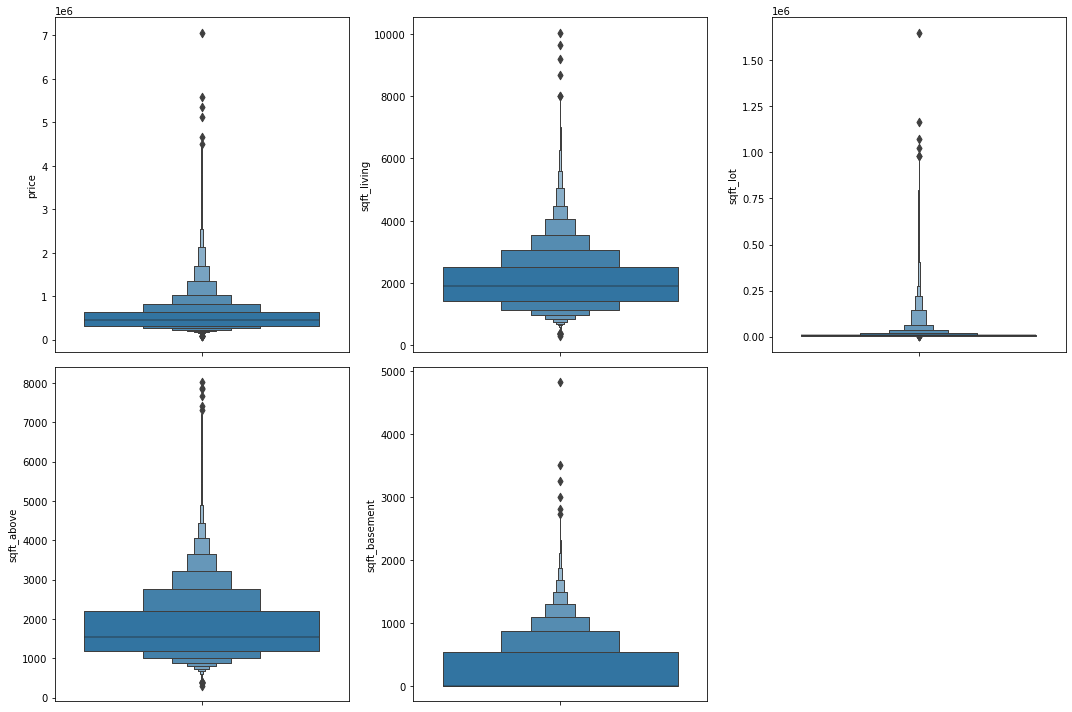

In [21]:
plot_boxen(2,3,outlier_cols)

#### Observation 
---
    - As there are quite a few outliers persent in all the columns lets calculate the total percent of outliers and remove those outlier data.

In [22]:
outlier_index = list()
for col, rows in df.items():
    if col in outlier_cols:
        Q1 = rows.quantile(0.25)
        Q3 = rows.quantile(0.75)
        IQR = Q3 -Q1
        outliers_data = rows[(rows <= Q1 - 1.5 * IQR) | (rows >= Q3 + 1.5 * IQR)]
        outlier_index.extend(outliers_data.index.tolist())
        outlier_row_percent = round((len(outliers_data) * 100) / len(rows),2)
        print(f"{col} has {outlier_row_percent}% of outliers.")

outlier_index = set(outlier_index)        
outlier_percent = round((len(outlier_index) * 100) / len(df),2)    
print(f"we have {outlier_percent}% of outliers combining all columns in our dataset.")

price has 5.18% of outliers.
sqft_living has 2.64% of outliers.
sqft_lot has 11.23% of outliers.
sqft_above has 2.94% of outliers.
sqft_basement has 2.63% of outliers.
we have 17.23% of outliers combining all columns in our dataset.


In [23]:
df.drop(index=outlier_index, inplace=True)

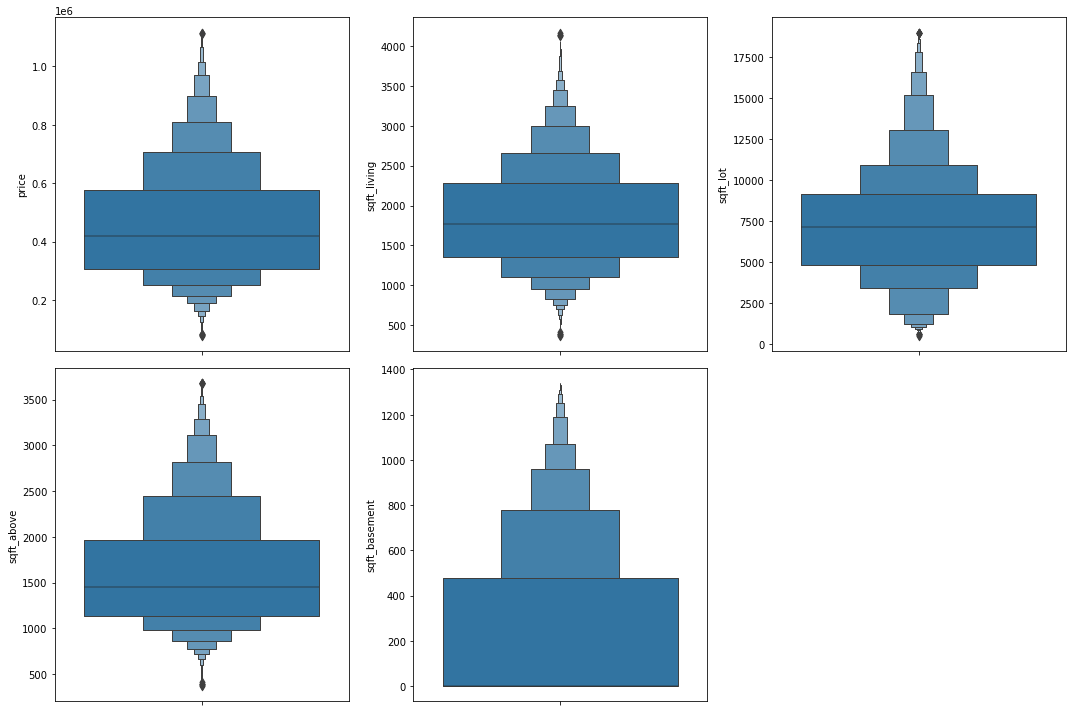

In [24]:
plot_boxen(2,3,outlier_cols)

_Let's save the dataframe to csv_

In [25]:
df.to_csv('data/kc_house_data_cleaned.csv')